In [11]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/PS4_GamesSales.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataframe
df.head()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Summarize the dataset
summary_stats = df.describe()
info = df.info()

summary_stats, info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


(              Year  North America       Europe        Japan  Rest of World  \
 count   825.000000    1034.000000  1034.000000  1034.000000    1034.000000   
 mean   2015.966061       0.204613     0.248714     0.033636       0.089014   
 std       1.298360       0.563471     0.785491     0.108344       0.249410   
 min    2013.000000       0.000000     0.000000     0.000000       0.000000   
 25%    2015.000000       0.000000     0.000000     0.000000       0.000000   
 50%    2016.000000       0.020000     0.000000     0.000000       0.010000   
 75%    2017.000000       0.120000     0.130000     0.030000       0.050000   
 max    2020.000000       6.180000     9.710000     2.170000       3.020000   
 
             Global  
 count  1034.000000  
 mean      0.576054  
 std       1.583534  
 min       0.000000  
 25%       0.000000  
 50%       0.060000  
 75%       0.357500  
 max      19.390000  ,
 None)

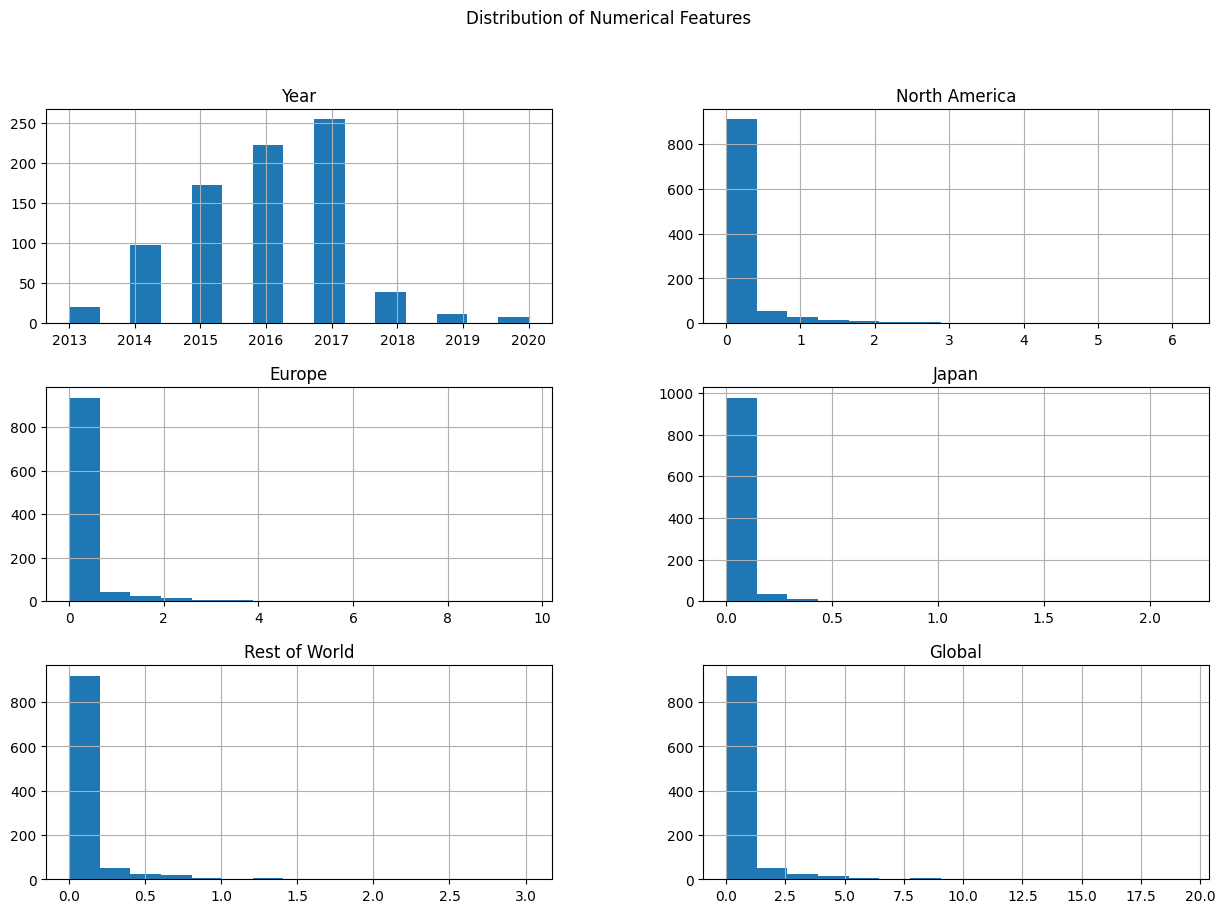

In [6]:
import matplotlib.pyplot as plt

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


<ipython-input-7-9a25160a7534>:13: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
<ipython-input-7-9a25160a7534>:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


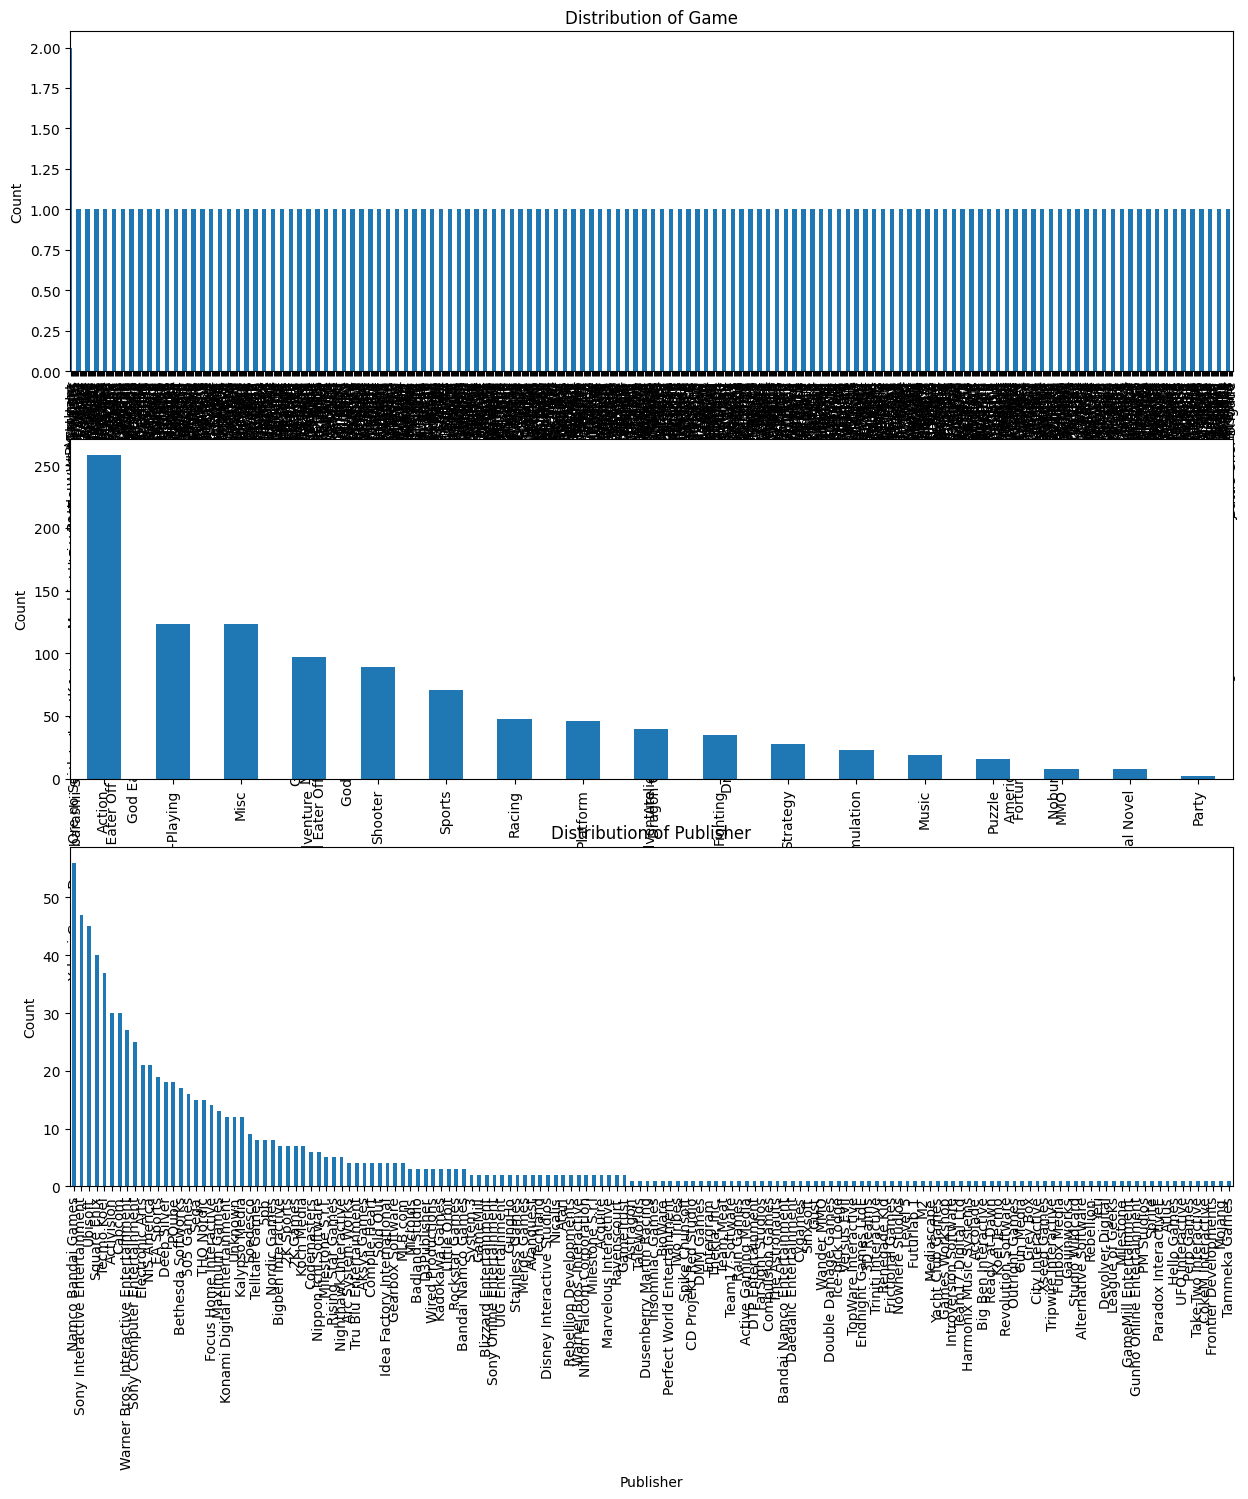

In [7]:
# Select categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Plot bar plots for categorical features
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(15, 5*len(categorical_features)))

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


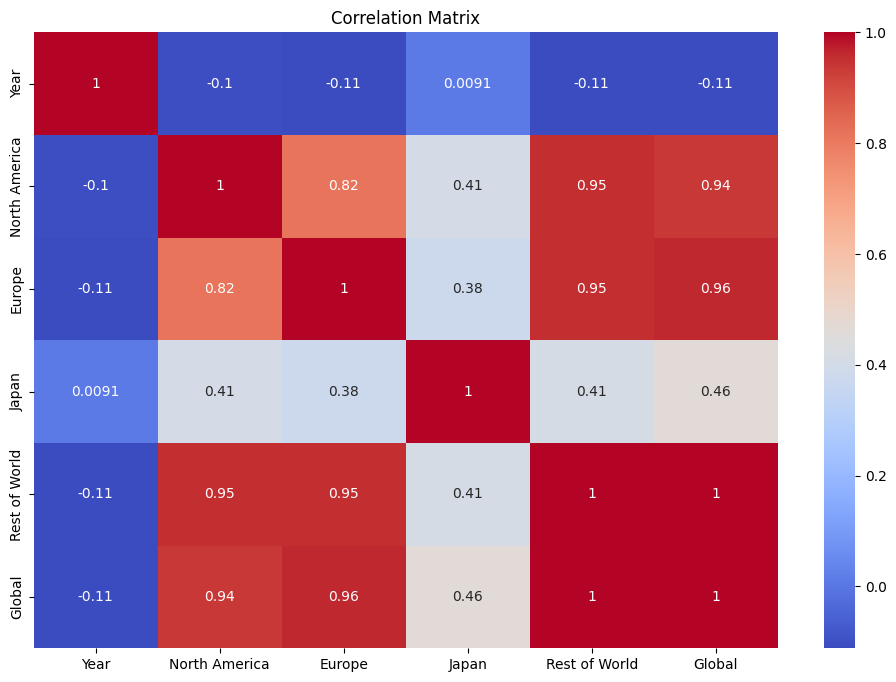

In [8]:
import seaborn as sns

# Remove the non-numeric column
df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Year             209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [10]:
# Calculate the median of the 'year' column
median_year = df['Year'].median()
print(f"Median of 'Year' column: {median_year}")

# Fill missing values in the 'year' column with the median
df['Year'].fillna(median_year, inplace=True)

# Verify that there are no missing values in the 'year' column
missing_values_after = df['Year'].isnull().sum()
print(f"Number of missing values in 'Year' column after imputation: {missing_values_after}")

# Display the first few rows of the dataframe to confirm changes
df.head()


Median of 'Year' column: 2016.0
Number of missing values in 'Year' column after imputation: 0


,Year,North America,Europe,Japan,Rest of World,Global
0,2014.0,6.06,9.71,0.60,3.02,19.39
1,2015.0,6.18,6.05,0.41,2.44,15.09
2,2018.0,5.26,6.21,0.21,2.26,13.94
3,2017.0,4.67,6.21,0.40,2.12,13.40
4,2017.0,1.27,8.64,0.15,1.73,11.80


In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,-1.515183,Action,Rockstar Games,10.396663,12.050881,5.230001,11.757360,11.886737
1,Call of Duty: Black Ops 3,-0.744513,Shooter,Activision,10.609732,7.389123,3.475474,9.430748,9.169978
2,Red Dead Redemption 2,1.567495,Action-Adventure,Rockstar Games,8.976205,7.592916,1.628604,8.708696,8.443402
3,Call of Duty: WWII,0.796825,Shooter,Activision,7.928618,7.592916,3.383130,8.147100,8.102228
4,FIFA 18,0.796825,Sports,EA Sports,1.891671,10.688018,1.074543,6.582654,7.091341
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,-0.363305,-0.316788,-0.310610,-0.357069,-0.363954
1030,Radial G Racing Revolved,0.796825,Racing,Tammeka Games,-0.363305,-0.316788,-0.310610,-0.357069,-0.363954
1031,The Mummy Demastered,NaN,Action,NaN,-0.363305,-0.316788,-0.310610,-0.357069,-0.363954
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,-0.363305,-0.316788,-0.310610,-0.357069,-0.363954


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Scale features to a range
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,0.142857,Action,Rockstar Games,0.980583,1.000000,0.276498,1.000000,1.000000
1,Call of Duty: Black Ops 3,0.285714,Shooter,Activision,1.000000,0.623069,0.188940,0.807947,0.778236
2,Red Dead Redemption 2,0.714286,Action-Adventure,Rockstar Games,0.851133,0.639547,0.096774,0.748344,0.718927
3,Call of Duty: WWII,0.571429,Shooter,Activision,0.755663,0.639547,0.184332,0.701987,0.691078
4,FIFA 18,0.571429,Sports,EA Sports,0.205502,0.889804,0.069124,0.572848,0.608561
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1030,Radial G Racing Revolved,0.571429,Racing,Tammeka Games,0.000000,0.000000,0.000000,0.000000,0.000000
1031,The Mummy Demastered,NaN,Action,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=['Global'])
y = df['Global']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World
294,694,0.428571,1,115,0.022654,0.009269,0.000000,0.016556
453,812,0.571429,6,88,0.000000,0.000000,0.041475,0.000000
638,912,0.571429,12,87,0.003236,0.000000,0.000000,0.000000
139,558,0.571429,0,131,0.055016,0.037075,0.092166,0.046358
539,779,0.571429,12,115,0.006472,0.000000,0.000000,0.003311
...,...,...,...,...,...,...,...,...
944,398,NaN,0,152,0.000000,0.000000,0.000000,0.000000
357,477,0.571429,10,83,0.009709,0.008239,0.000000,0.009934
485,634,0.428571,11,119,0.000000,0.000000,0.032258,0.000000
596,638,0.285714,2,4,0.004854,0.000000,0.000000,0.003311


In [30]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the first few rows of the dataframe to confirm changes
df.head()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,344,0.142857,0,109,0.980583,1.000000,0.276498,1.000000,1.000000
1,129,0.285714,12,8,1.000000,0.623069,0.188940,0.807947,0.778236
2,670,0.714286,1,109,0.851133,0.639547,0.096774,0.748344,0.718927
3,133,0.571429,12,8,0.755663,0.639547,0.184332,0.701987,0.691078
4,278,0.571429,14,41,0.205502,0.889804,0.069124,0.572848,0.608561


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming X_train, X_test, y_train, y_test are already defined

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_imputed, y_train)  # Fit the model on imputed data
knn_pred = knn.predict(X_test_imputed)  # Predict on imputed data

# Evaluate KNN model
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print('KNN MSE:', knn_mse)
print('KNN R2:', knn_r2)


KNN MSE: 0.006328319713547661
KNN R2: 0.13853893114369764


In [41]:
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# SVM model
svm = SVR(kernel='linear')
svm.fit(X_train_imputed, y_train) # Fit using imputed data
svm_pred = svm.predict(X_test_imputed) # Predict using imputed data

# Evaluate SVM model
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

svm_mse, svm_r2

(0.008393341778007837, -0.14256824981199379)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import imputer to handle missing values

# Assuming X_train, X_test, y_train, y_test are already defined
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean') # Create imputer with mean strategy
X_train_imputed = imputer.fit_transform(X_train) # Fit and transform on training data
X_test_imputed = imputer.transform(X_test) # Transform test data using the fitted imputer

rf.fit(X_train_imputed, y_train) # Fit the model on imputed training data
rf_pred = rf.predict(X_test_imputed) # Predict on imputed test data

# Evaluate RF model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Random Forest MSE:', rf_mse)
print('Random Forest R2:', rf_r2)


Random Forest MSE: 4.691719319644688e-05
Random Forest R2: 0.9936132595652171


In [48]:
results = {
    'Model': ['KNN', 'SVM', 'Random Forest'],
    'MSE': [knn_mse, svm_mse, rf_mse],
    'R2': [knn_r2, svm_r2, rf_r2]
}

results_df = pd.DataFrame(results)
results_df


,Model,MSE,R2
0,KNN,0.006328,0.138539
1,SVM,0.008393,-0.142568
2,Random Forest,0.000047,0.993613


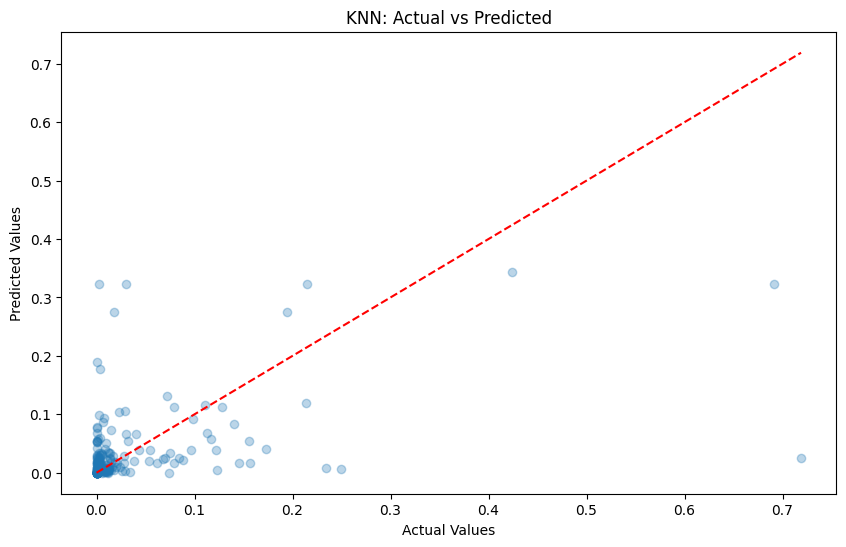

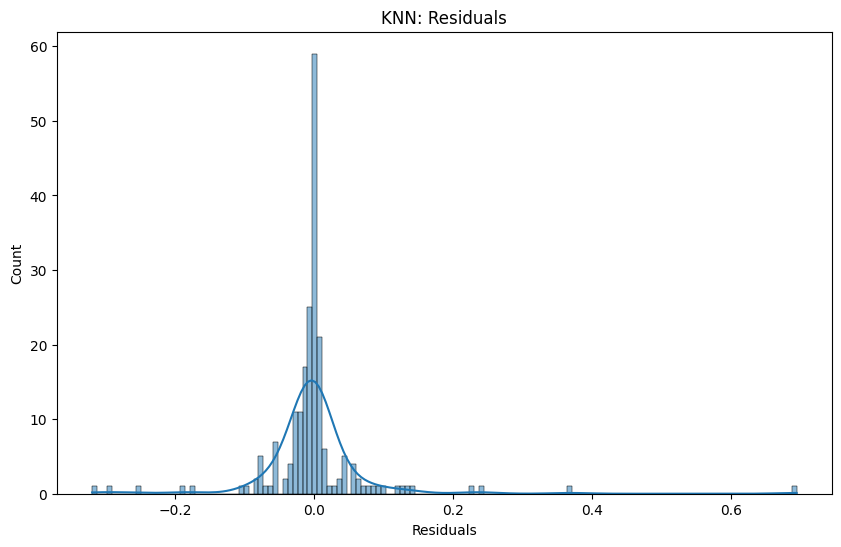

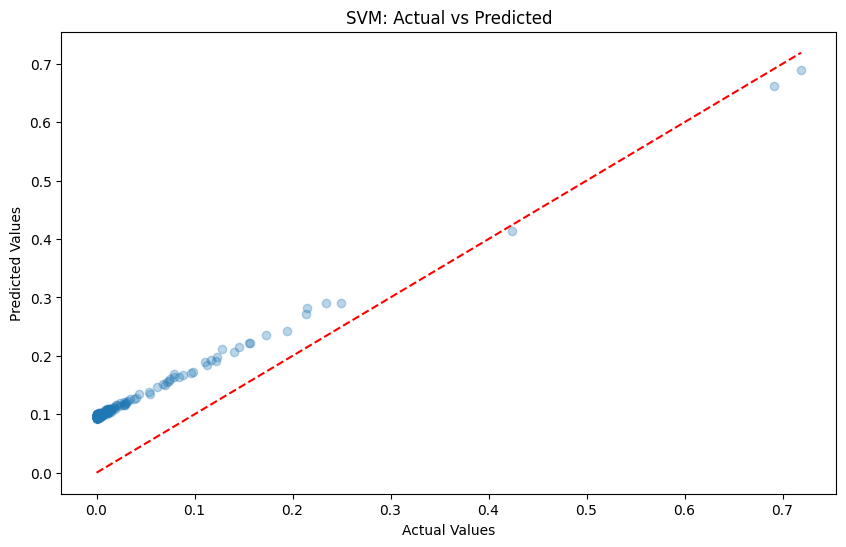

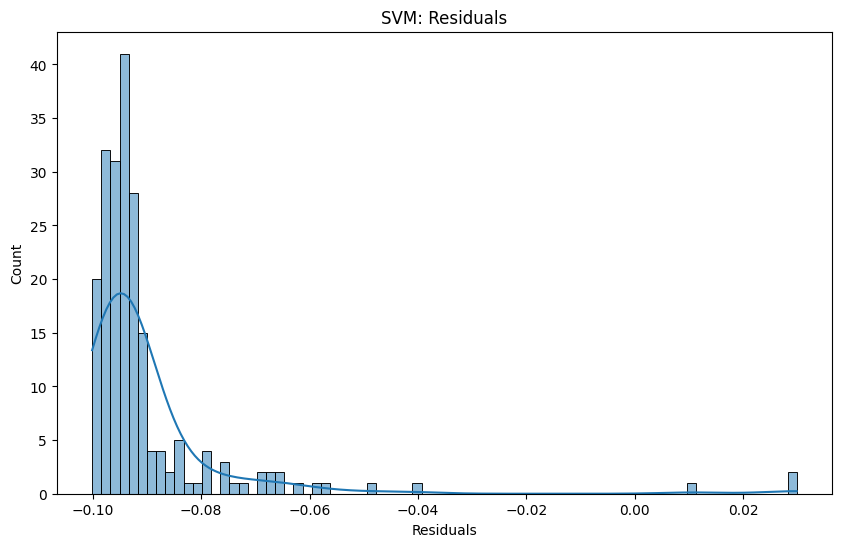

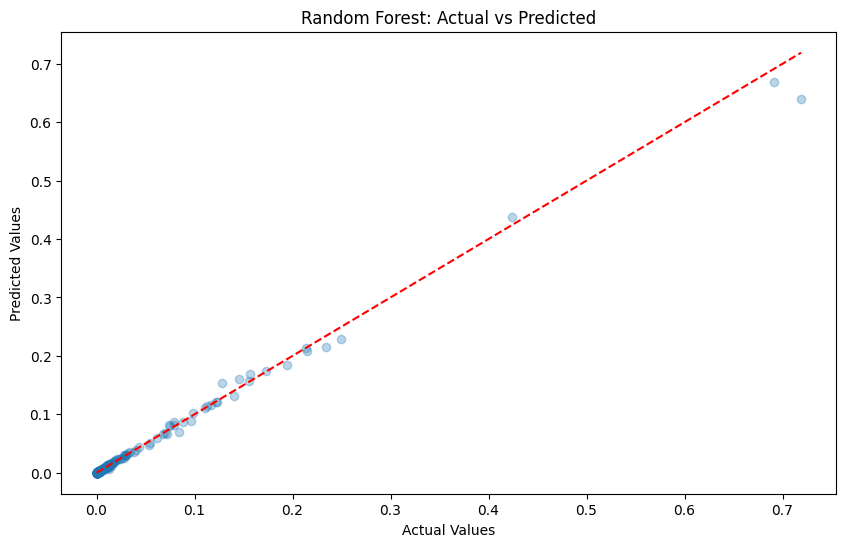

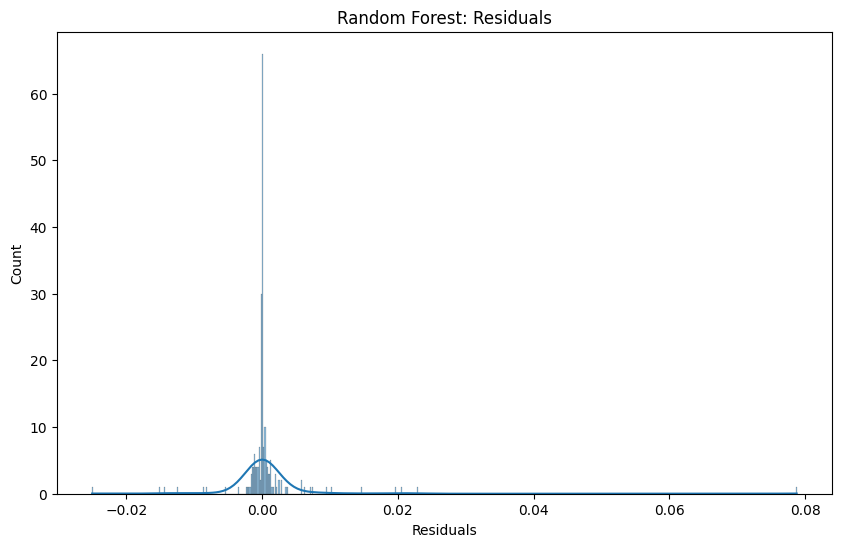

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Actual vs. Predicted Values
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.show()

# Residual Plot
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(title)
    plt.show()

# Plot for KNN
plot_actual_vs_predicted(y_test, knn_pred, 'KNN: Actual vs Predicted')
plot_residuals(y_test, knn_pred, 'KNN: Residuals')

# Plot for SVM
plot_actual_vs_predicted(y_test, svm_pred, 'SVM: Actual vs Predicted')
plot_residuals(y_test, svm_pred, 'SVM: Residuals')

# Plot for Random Forest
plot_actual_vs_predicted(y_test, rf_pred, 'Random Forest: Actual vs Predicted')
plot_residuals(y_test, rf_pred, 'Random Forest: Residuals')


In [51]:
import plotly.express as px

# Tree map for game genre distribution
genre_counts = df['Genre'].value_counts()
fig = px.treemap(names=genre_counts.index, values=genre_counts.values, title='Tree Map: Game Genre Distribution')
fig.show()


<ipython-input-52-0319ec938875>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




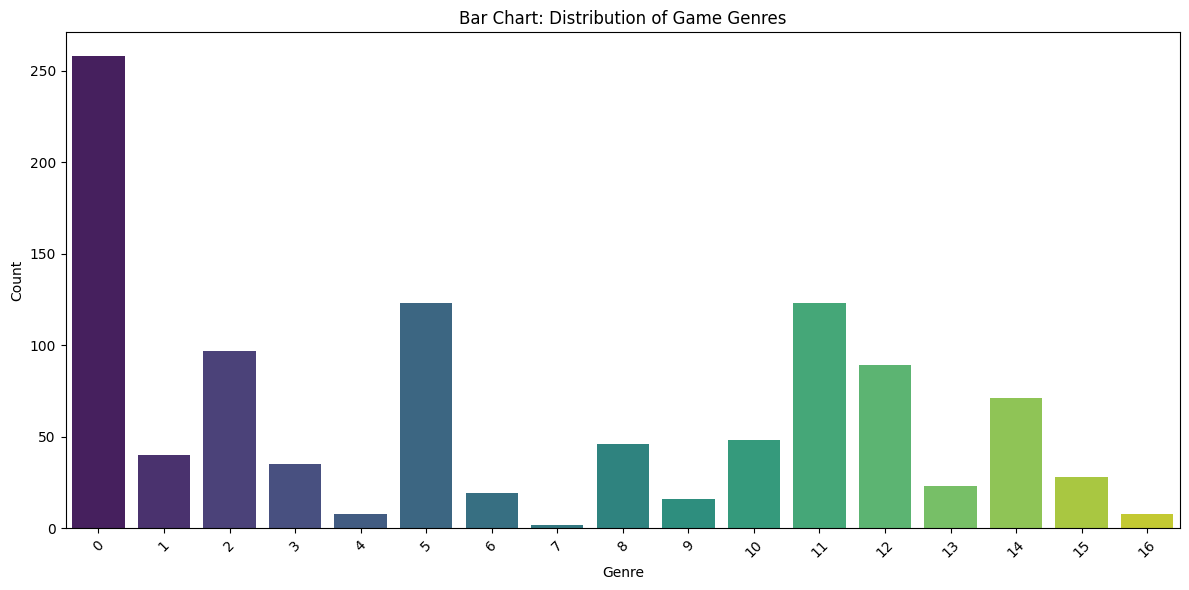

In [52]:
# Bar chart for game genre distribution
plt.figure(figsize=(12, 6))
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Game Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


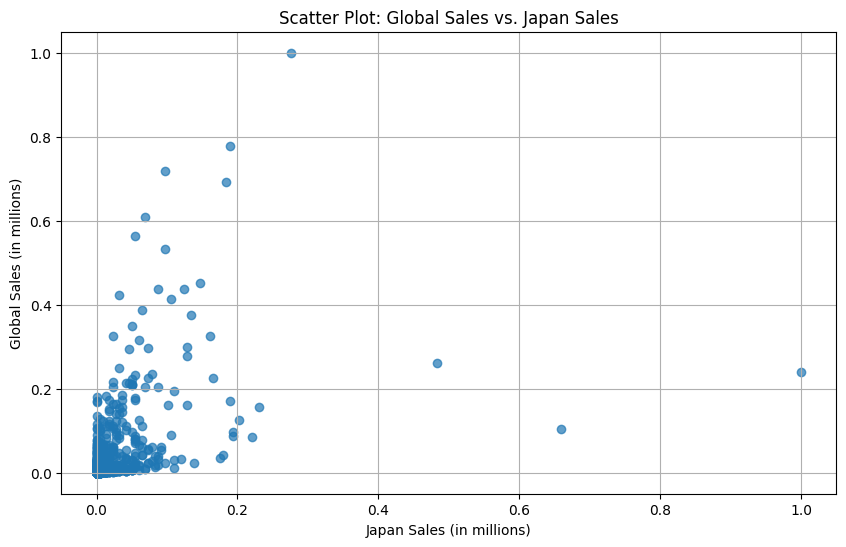

In [53]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing 'Global_Sales' and 'Japan_Sales'

plt.figure(figsize=(10, 6))
plt.scatter(df['Japan'], df['Global'], alpha=0.7)
plt.xlabel('Japan Sales (in millions)')
plt.ylabel('Global Sales (in millions)')
plt.title('Scatter Plot: Global Sales vs. Japan Sales')
plt.grid(True)
plt.show()
